In [2]:
import pandas as pd
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.decomposition
from sklearn.decomposition import PCA
from scipy import stats

In [3]:
#load csv containing the features 
df1 = pd.read_csv('../data/features.csv',index_col= 0)

# putting all of the data gotten above into a matrix and deleting the rows which have strings on them
p = df1.values
col = p.shape[1]

# Delete variable columns for now, need to manually count later
matrix = np.delete(p,[0,col-6,col-5,col-4,col-3,col-2,col-1],1)

# load csv containing the avg raitings
df2 = pd.read_csv('../data/average_ratings.csv',usecols=['snippet rating'])

# load csv containing the mode ratings
df3 = pd.read_csv('../data/mode_ratings.csv',usecols=['snippet rating'])

# changing col names in df2 and df3 so they don't have two columns with the same names
df2 = df2.rename(columns = {'snippet rating':'avg rating'})
df3 = df3.rename(columns = {'snippet rating' : 'mode rating'})

#store the ratings and features in a single df that is to be analyzed
d = pd.concat([df1,df2,df3],axis=1)
d = d.drop(columns=['filename','avg_vars_len','max_vars_len','avg_vars_count','max_vars_count','max_occurence_of_var','vars'])

# PCA

In [4]:
matrix = matrix.astype(float)
corr_matrix = np.corrcoef(np.transpose(matrix))
pca = PCA(n_components=7)
pca.fit(matrix)
print("This is the explained variance with only 7 components "  + str(np.sum(pca.explained_variance_ratio_)))

#print("This is the covariance mat")
#print(corr_matrix)

This is the explained variance with only 7 components 0.9978066275021188


# Average Ratings Scatter Plot

avg_line_len
0.7033474898663734
avg_periods
0.5296281607185745
avg_parentheses
0.49906243287273744
avg_assignments
0.5545429434818985


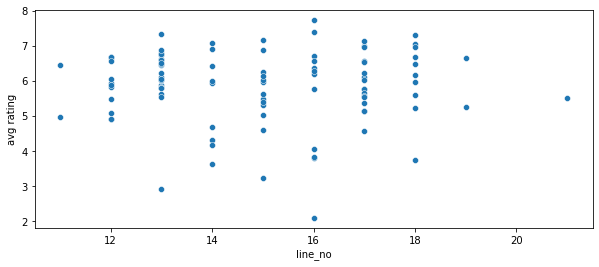

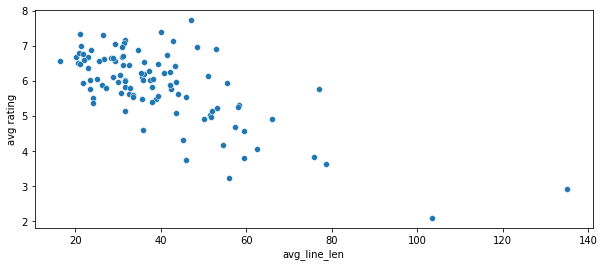

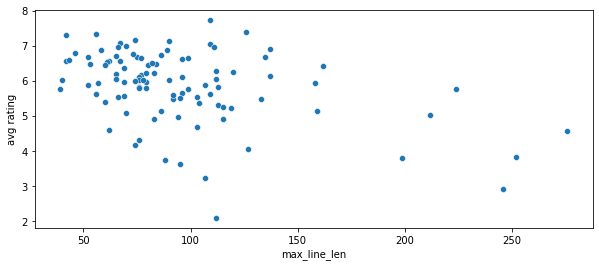

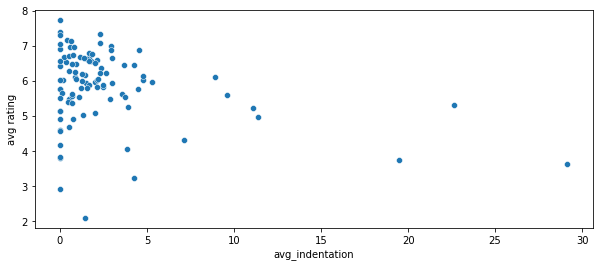

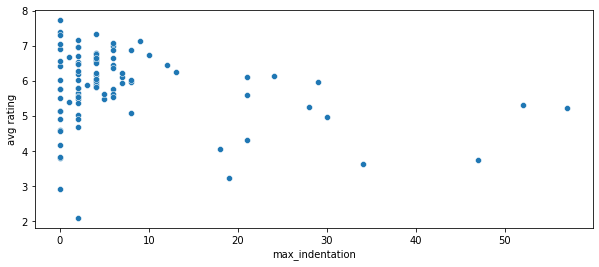

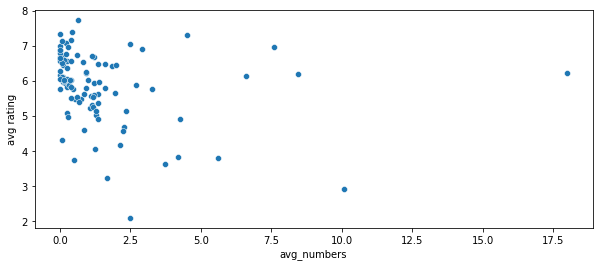

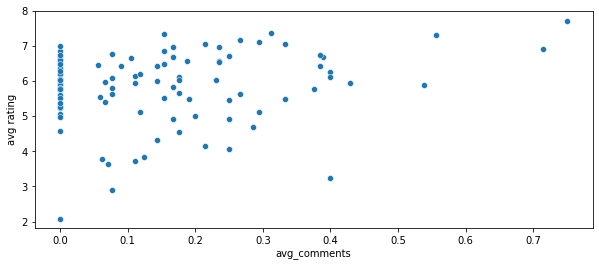

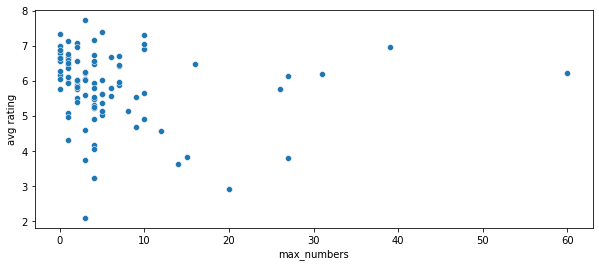

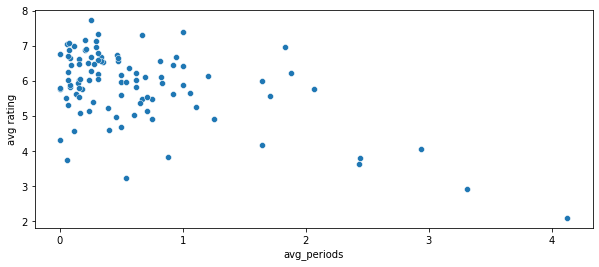

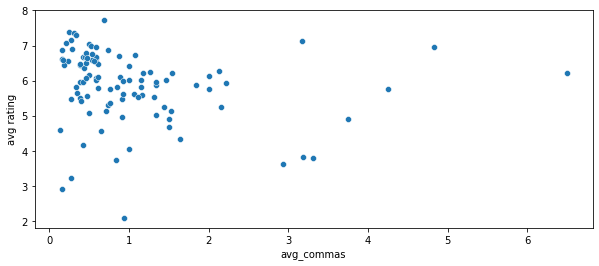

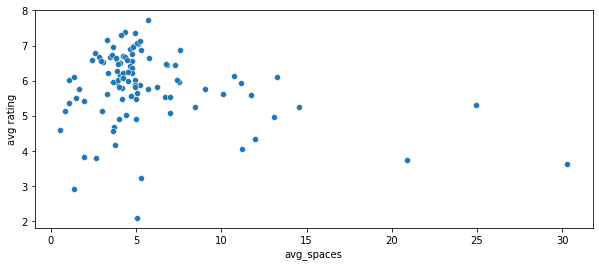

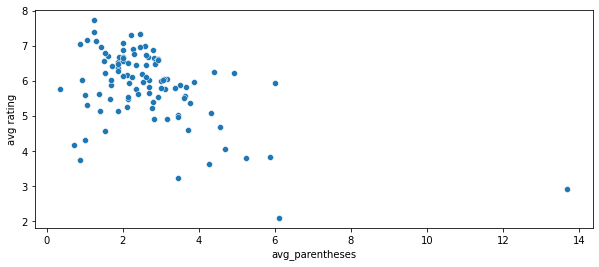

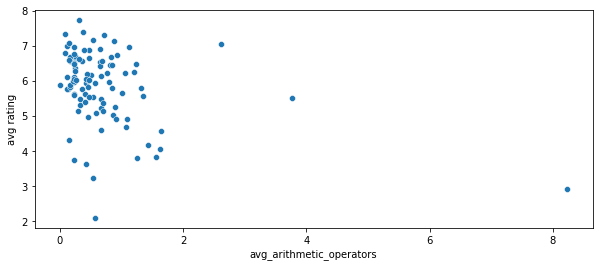

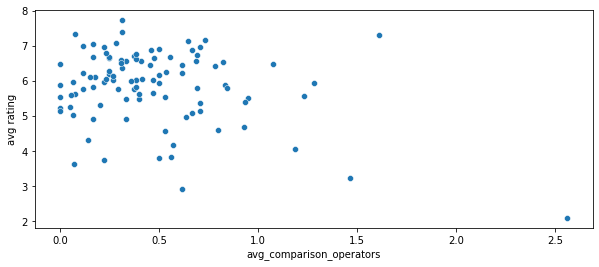

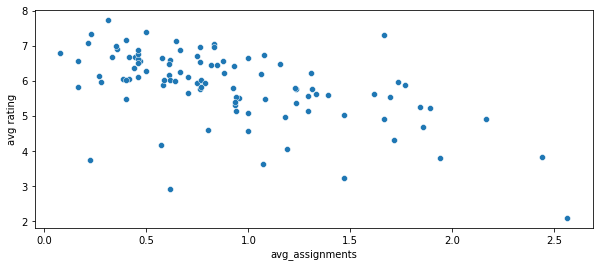

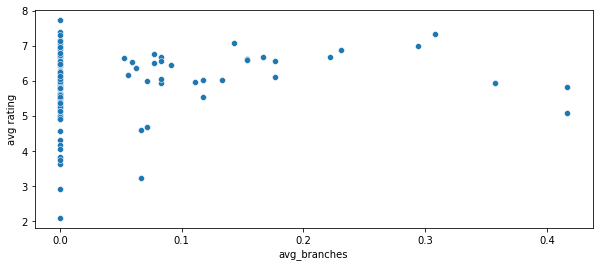

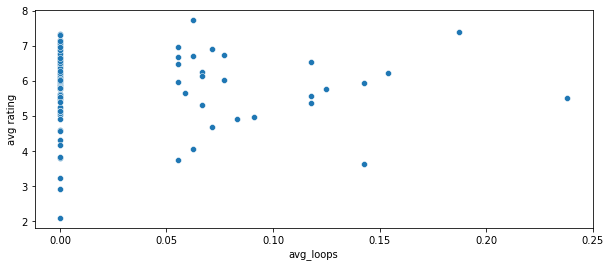

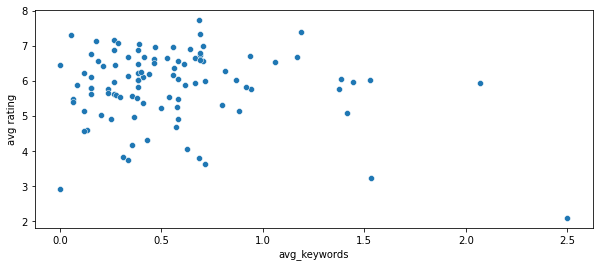

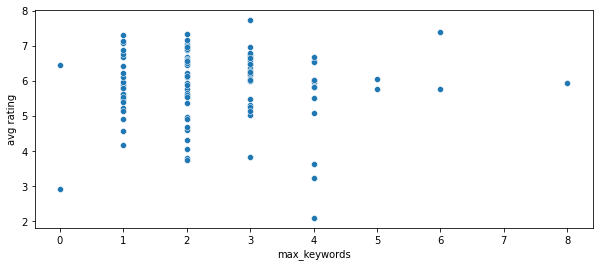

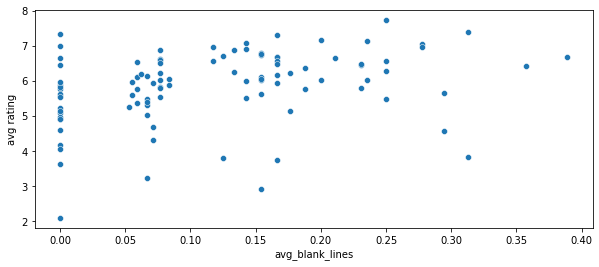

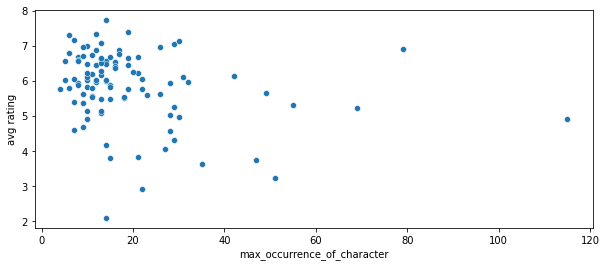

In [19]:
plt.rcParams.update({'figure.max_open_warning': 0})
corr_dic = {}
sign_arr = []

# Scatterplot of snippet features and their avg rating
for i in d.columns:
    if(i != 'avg rating' and i != 'mode rating'):
        fig, axs = plt.subplots(1,1)
        fig.set_figwidth(10)
        
        sns.scatterplot(data = d, x = i, y = 'avg rating')
        corr = (stats.pearsonr(d[i],d['avg rating'])[0])
        corr_dic[i] = abs(corr)
        
        if(np.sign(corr) > 0):
            sign_arr.append("positive")
        else:
            sign_arr.append("negative")
            
        if(abs(corr)>0.49):
            print(i)
            print(abs(corr))
            

# Plotting the avg rating with respect to feature correlation

<AxesSubplot:title={'center':'Feature correlation with average rating'}>

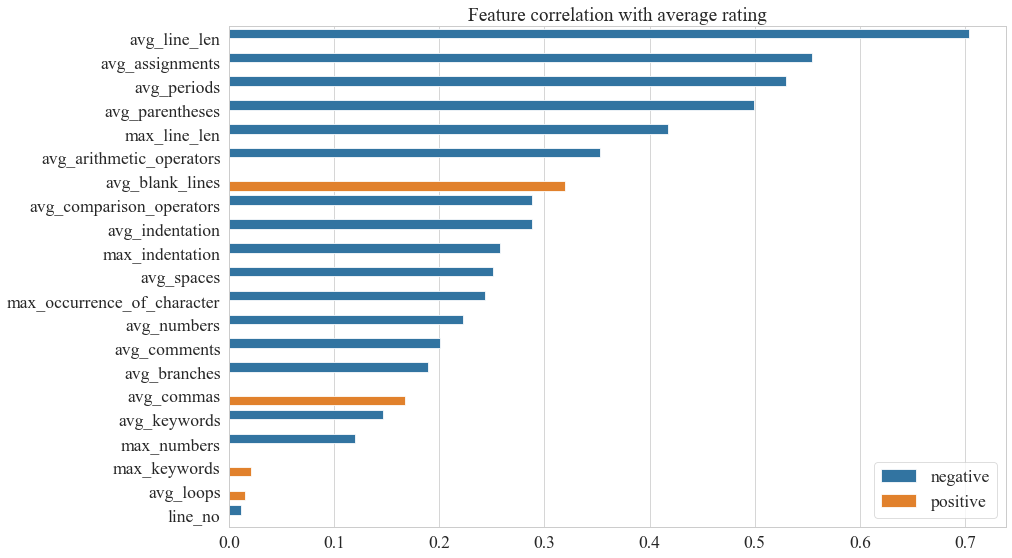

In [30]:
corr_dic = dict(sorted(corr_dic.items(), key=lambda item: -abs(item[1])))

fig = plt.figure(figsize=(3.48*4,2.3*4))
plt.title("Feature correlation with average rating")
sns.set_context("paper", font_scale=2)
sns.set_style('whitegrid')
sns.set_style({'font.family': 'Times New Roman'})
sns.barplot(x = list(corr_dic.values()) , y = list(corr_dic.keys()), hue = sign_arr)

# Correlation Matrix

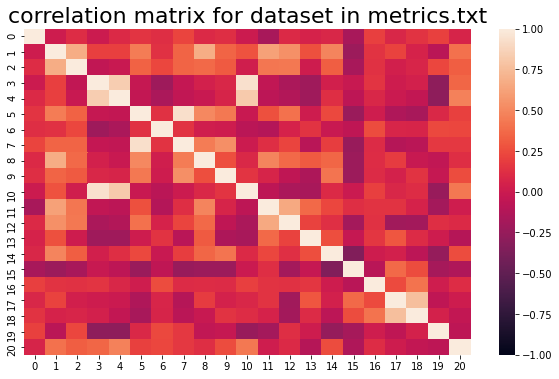

In [8]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1)
ax.set_title("correlation matrix for dataset in metrics.txt",fontsize = 22)
plt.show()